In [83]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_curve, auc,mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [68]:
df=pd.read_csv('C:\\Users\\User\\Downloads\\happiness_score_dataset.csv')
df.head()
df.shape

(158, 12)

The size is just 158 rows.

In [7]:
df.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

No Null values ,so imputing is not required

Exploratory Data Analysis

C:\Users\User\AppData\Local\Temp\ipykernel_14588\1721053027.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  region_break_up=df.groupby('Region')['Happiness Score','Economy (GDP per Capita)','Family','Freedom','Trust (Government Corruption)','Generosity', 'Dystopia Residual'].mean()


[Text(0, 0, 'Western Europe'),
 Text(1, 0, 'North America'),
 Text(2, 0, 'Australia and New Zealand'),
 Text(3, 0, 'Middle East and Northern Africa'),
 Text(4, 0, 'Latin America and Caribbean'),
 Text(5, 0, 'Southeastern Asia'),
 Text(6, 0, 'Central and Eastern Europe'),
 Text(7, 0, 'Eastern Asia'),
 Text(8, 0, 'Sub-Saharan Africa'),
 Text(9, 0, 'Southern Asia')]

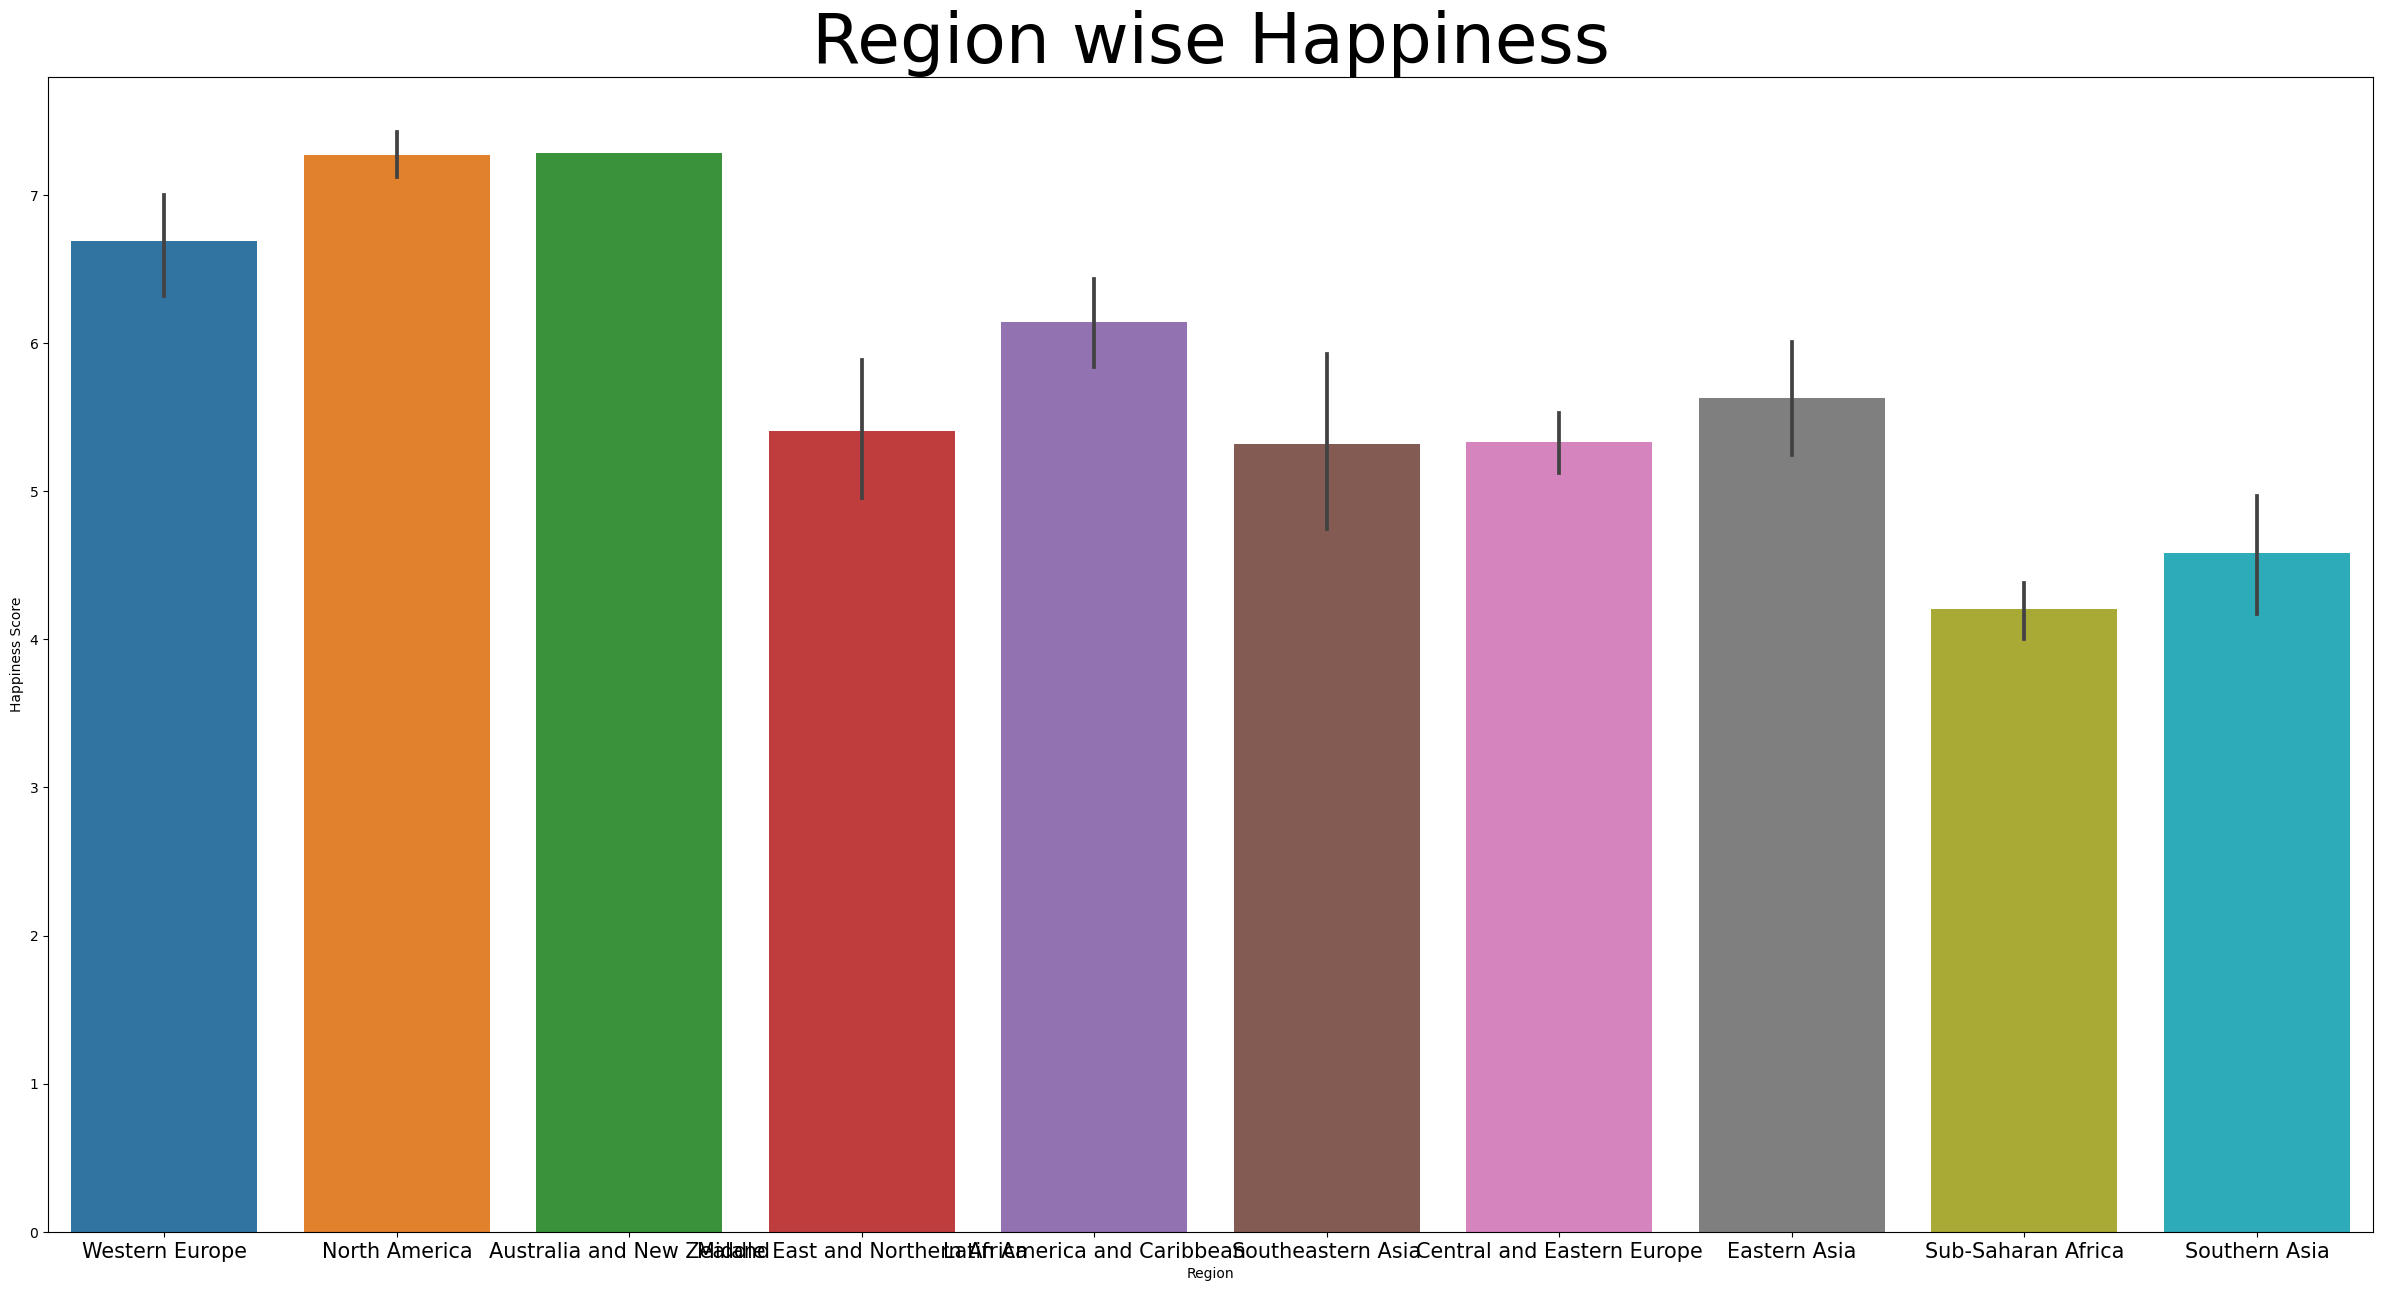

In [43]:
df.head()
# Create subplots
fig, axs = plt.subplots(1, 1, figsize=(30, 15))

# Plot regplots
region_break_up=df.groupby('Region')['Happiness Score','Economy (GDP per Capita)','Family','Freedom','Trust (Government Corruption)','Generosity', 'Dystopia Residual'].mean()
sns.barplot(data=df, x="Region",y="Happiness Score",ax=axs)
axs.set_title('Region wise Happiness',fontdict={'fontsize': 50})
axs.set_xticklabels(labels=df['Region'].unique(),fontdict={'fontsize': 15})

In [ ]:
North America and Australia are having the highest happiness and Africa with least happiness

[Text(0, 0, 'Western Europe'),
 Text(1, 0, 'North America'),
 Text(2, 0, 'Australia and New Zealand'),
 Text(3, 0, 'Middle East and Northern Africa'),
 Text(4, 0, 'Latin America and Caribbean'),
 Text(5, 0, 'Southeastern Asia'),
 Text(6, 0, 'Central and Eastern Europe'),
 Text(7, 0, 'Eastern Asia'),
 Text(8, 0, 'Sub-Saharan Africa'),
 Text(9, 0, 'Southern Asia')]

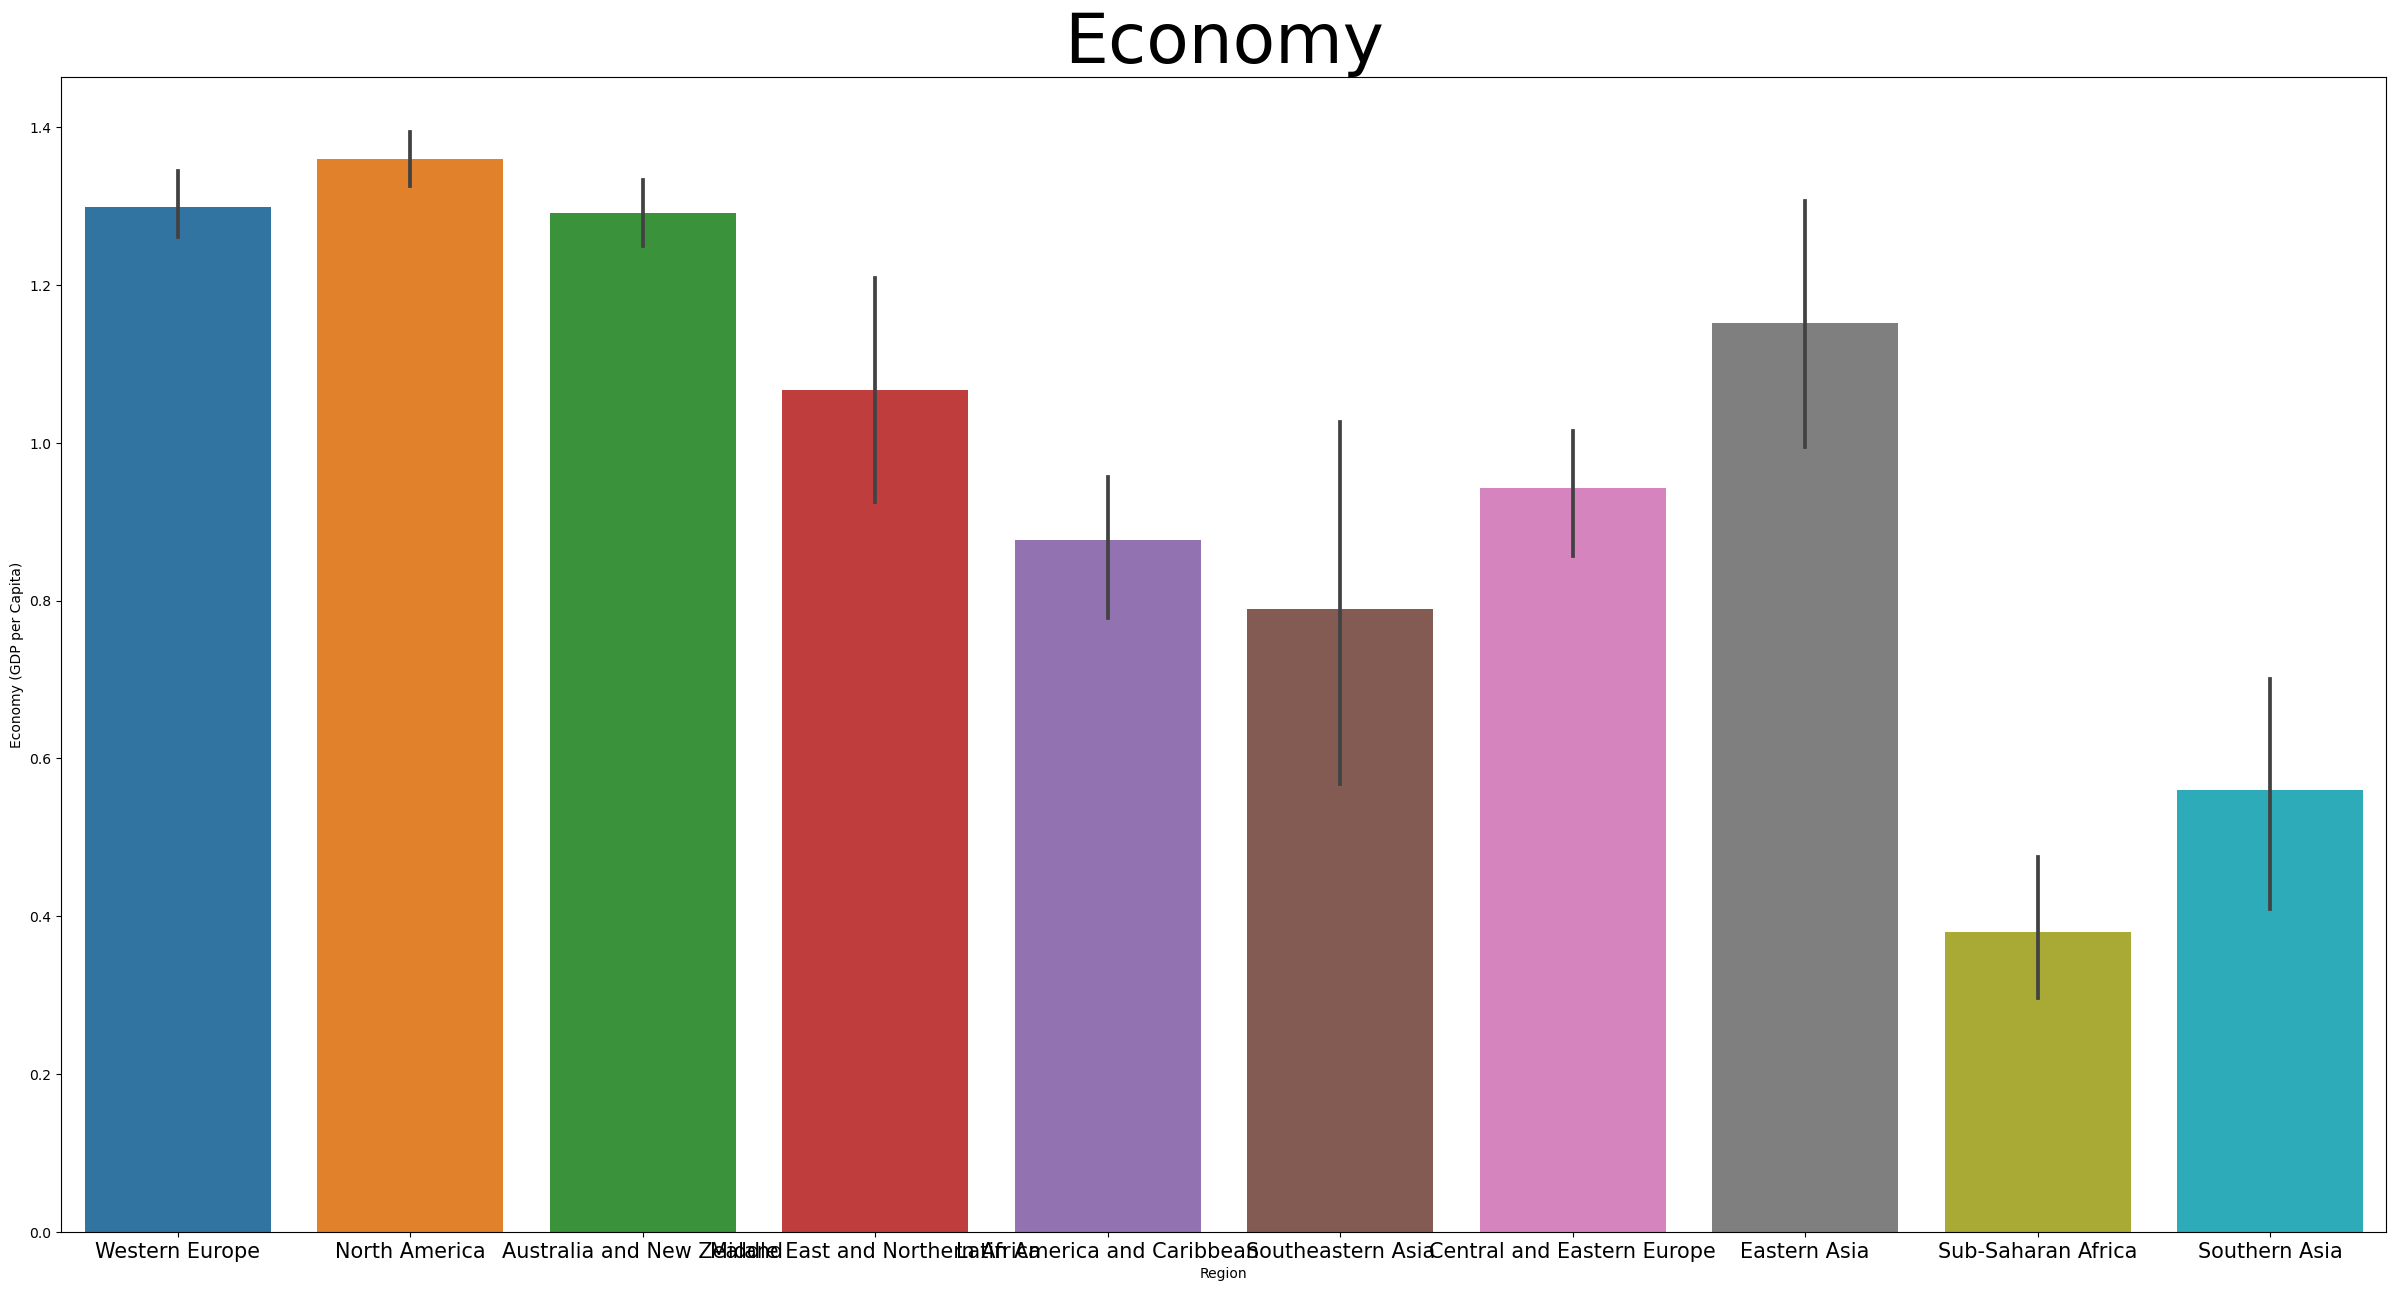

In [46]:
fig, axs = plt.subplots(1, 1, figsize=(30, 15))
sns.barplot(data=df, x="Region",y="Economy (GDP per Capita)")
axs.set_title('Economy',fontdict={'fontsize': 50})
axs.set_xticklabels(labels=df['Region'].unique(),fontdict={'fontsize': 15})

[Text(0, 0, 'Western Europe'),
 Text(1, 0, 'North America'),
 Text(2, 0, 'Australia and New Zealand'),
 Text(3, 0, 'Middle East and Northern Africa'),
 Text(4, 0, 'Latin America and Caribbean'),
 Text(5, 0, 'Southeastern Asia'),
 Text(6, 0, 'Central and Eastern Europe'),
 Text(7, 0, 'Eastern Asia'),
 Text(8, 0, 'Sub-Saharan Africa'),
 Text(9, 0, 'Southern Asia')]

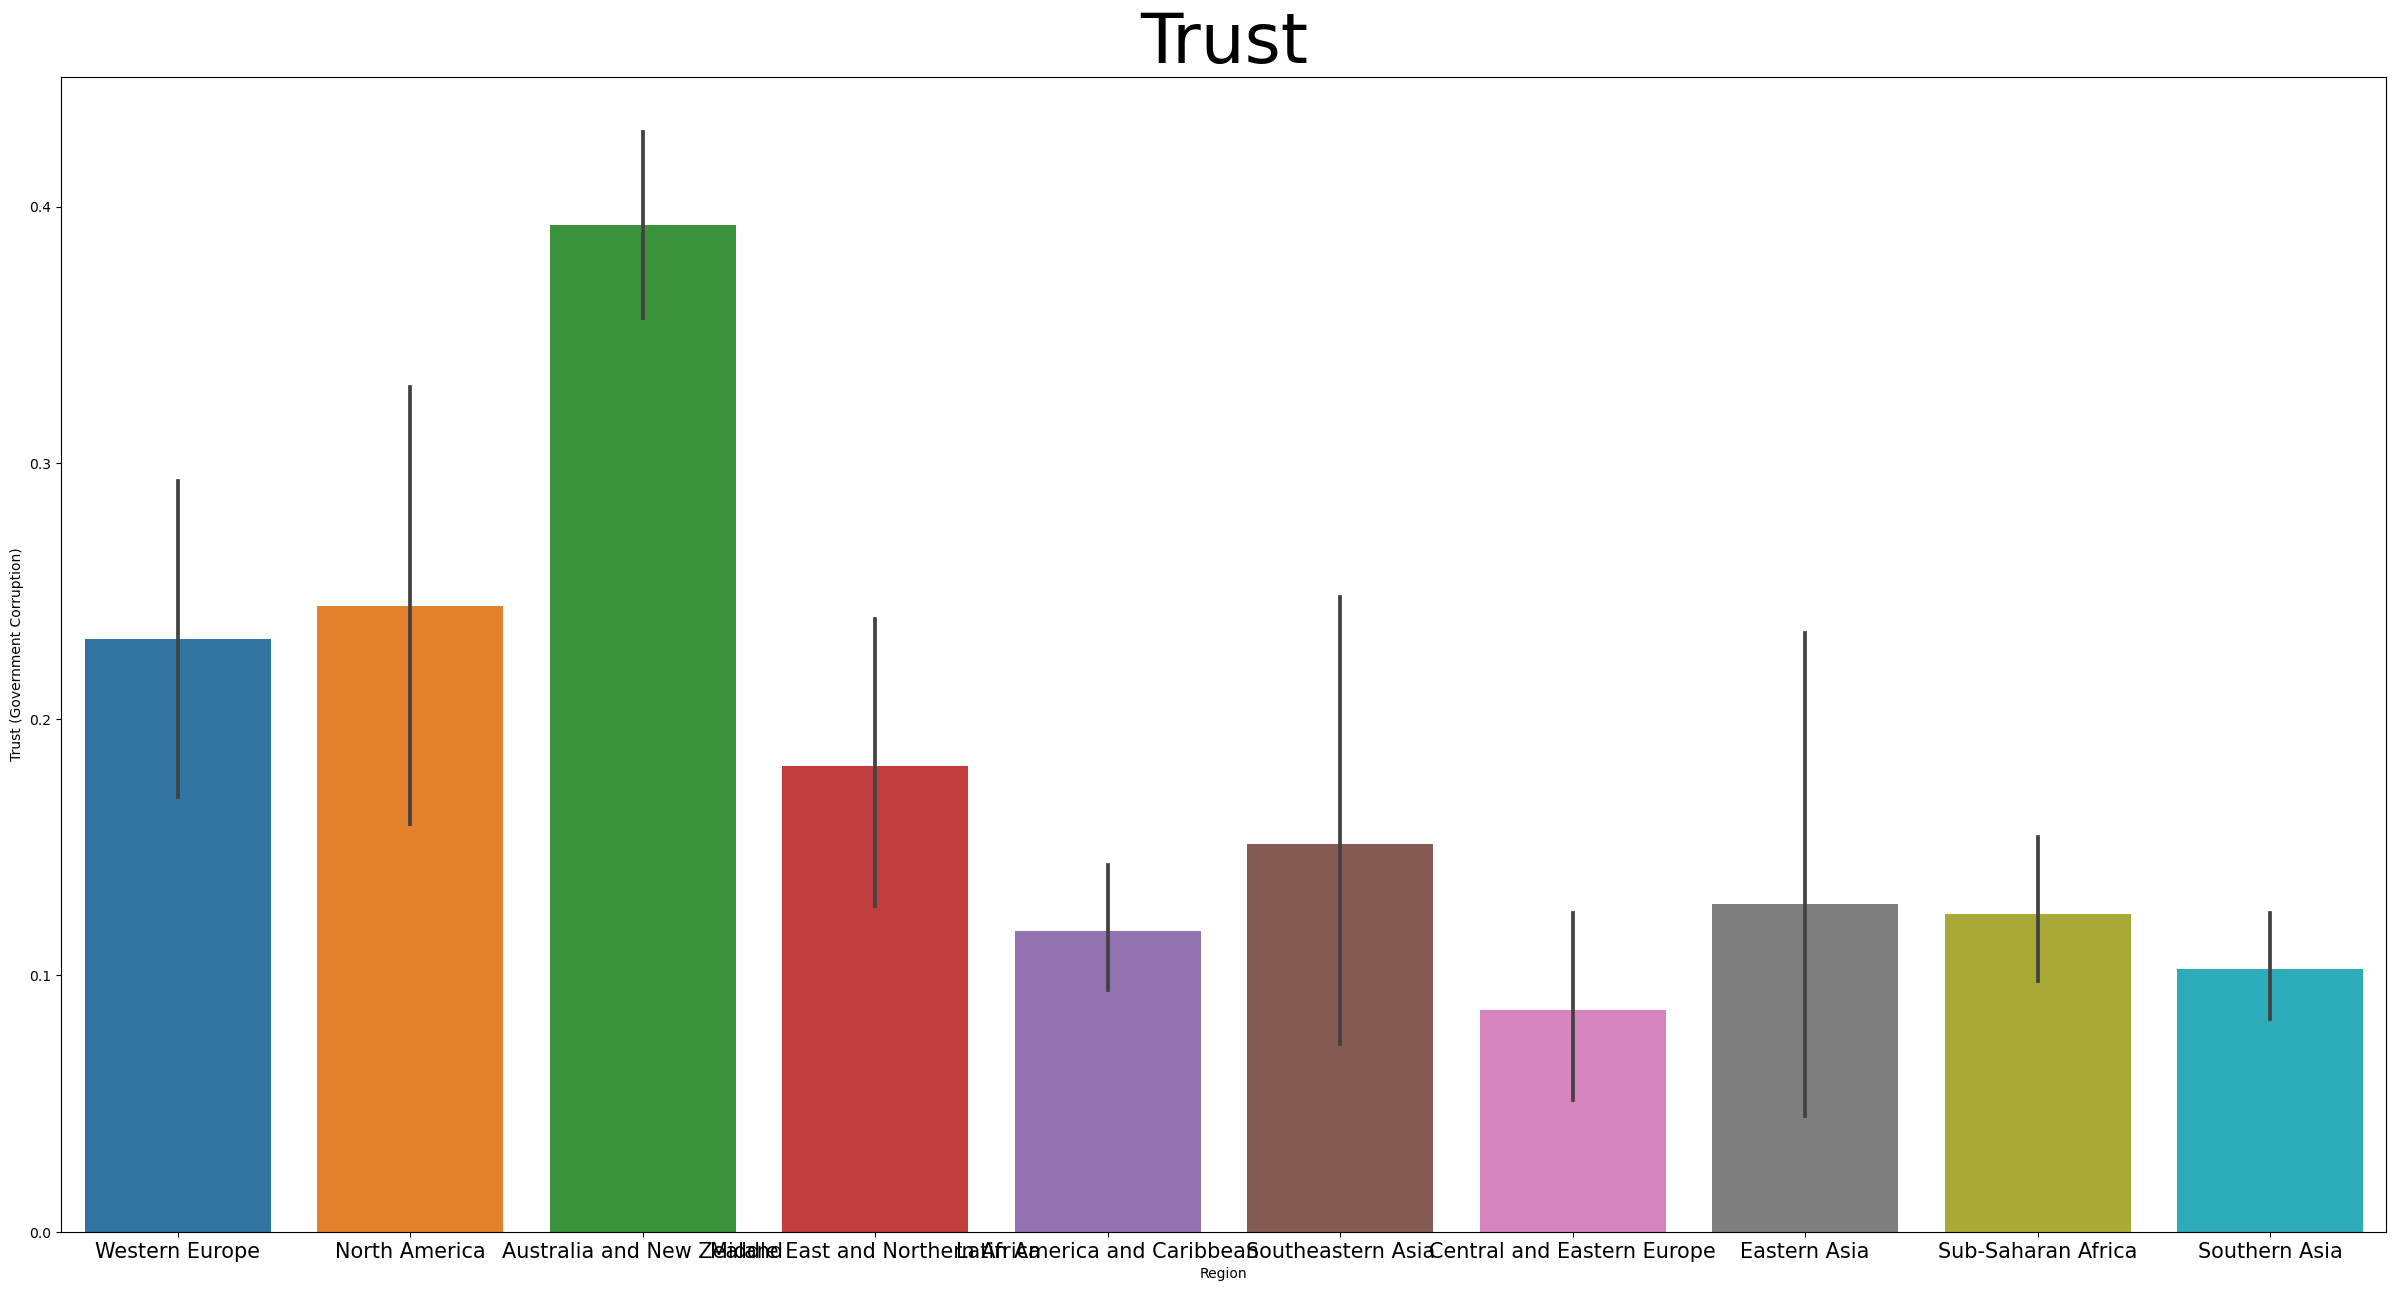

In [56]:
fig, axs = plt.subplots(1, 1, figsize=(30, 15))
sns.barplot(data=df, x="Region",y="Trust (Government Corruption)")
axs.set_title('Trust',fontdict={'fontsize': 50})
axs.set_xticklabels(labels=df['Region'].unique(),fontdict={'fontsize': 15})

Australia is with the highest Trust and Europe with least

In [69]:
# Label ENcoder for the categorical columns
df['Region']=preprocessing.LabelEncoder().fit_transform(df['Region'])
df['Country']=preprocessing.LabelEncoder().fit_transform(df['Country'])

In [66]:
features=df[['Happiness Score','Economy (GDP per Capita)','Family','Freedom','Trust (Government Corruption)','Generosity', 'Dystopia Residual','Standard Error','Health (Life Expectancy)']]
vif_data = pd.DataFrame()
vif_data["Variable"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif_data

,Variable,VIF
0,Happiness Score,3.991308e+08
1,Economy (GDP per Capita),1.159798e+07
2,Family,1.395395e+07
3,Freedom,2.724475e+06
4,Trust (Government Corruption),4.609854e+05
5,Generosity,9.550834e+05
6,Dystopia Residual,6.225343e+07
7,Standard Error,7.167549e+00
8,Health (Life Expectancy),6.050143e+06


None of the VIf is 3 or 5 so no multicollinearity

In [70]:
df=pd.get_dummies(data=df,columns=['Economy (GDP per Capita)','Family','Freedom','Trust (Government Corruption)','Generosity', 'Dystopia Residual','Standard Error','Health (Life Expectancy)'])
df.head()

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita)_0.0,Economy (GDP per Capita)_0.0153,Economy (GDP per Capita)_0.01604,Economy (GDP per Capita)_0.0694,Economy (GDP per Capita)_0.0712,Economy (GDP per Capita)_0.0785,...,Health (Life Expectancy)_0.93156,Health (Life Expectancy)_0.94143,Health (Life Expectancy)_0.94579,Health (Life Expectancy)_0.94784,Health (Life Expectancy)_0.95446,Health (Life Expectancy)_0.95562,Health (Life Expectancy)_0.96538,Health (Life Expectancy)_0.99111,Health (Life Expectancy)_1.01328,Health (Life Expectancy)_1.02525
0,135,9,1,7.587,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,58,9,2,7.561,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,37,9,3,7.527,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,105,9,4,7.522,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,24,5,5,7.427,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
y=df['Happiness Score']
X=df.drop(['Happiness Score'],axis=1)
print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


     Country  Region  Happiness Rank  Economy (GDP per Capita)_0.0  \
0        135       9               1                             0   
1         58       9               2                             0   
2         37       9               3                             0   
3        105       9               4                             0   
4         24       5               5                             0   
..       ...     ...             ...                           ...   
153      118       8             154                             0   
154       13       8             155                             0   
155      136       4             156                             0   
156       21       8             157                             0   
157      141       8             158                             0   

     Economy (GDP per Capita)_0.0153  Economy (GDP per Capita)_0.01604  \
0                                  0                                 0   
1          

In [72]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
X_train=pca.fit_transform(X_train)

In [73]:
X_test = pca.transform(X_test)

In [78]:
# Initialize Linear Regression model
linear_reg = LinearRegression()

# Train the model
linear_reg.fit(X_train, y_train)

# Make predictions
y_pred = linear_reg.predict(X_test)

# Evaluate the model
mse1 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse1)

Mean Squared Error: 0.01980474311803904


In [79]:
# Initialize Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor()

# Train the model
dt_regressor.fit(X_train, y_train)

# Make predictions
y_pred = dt_regressor.predict(X_test)

# Evaluate the model
mse2 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse2)

Mean Squared Error: 0.25743203773584905


In [84]:
rf_regressor = RandomForestRegressor()

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse3 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse3)

Mean Squared Error: 0.2180220224528312


Linear Regression is the preferred Model 